In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
data= pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [4]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
x = data.drop('quality', axis=1)
y= data['quality']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
models =[
    ('Random Forest',RandomForestClassifier()),
    ('stochastic Gradient Descent',SGDClassifier()),
    ('Support Vector Classifier',SVC())
    
]

In [9]:
for name, model in models:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(f"model:{name}")
    print(classification_report(Y_test, y_pred))
    print("Accuracy:",accuracy_score(Y_test, y_pred))
    print("="*50)

model:Random Forest
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.81      0.76        96
           6       0.67      0.67      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.70      0.68       229

Accuracy: 0.6986899563318777
model:stochastic Gradient Descent
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.79      0.11      0.20        96
           6       0.46      0.98      0.62        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.47       229
   macro avg       0.25      0.22      0.16     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

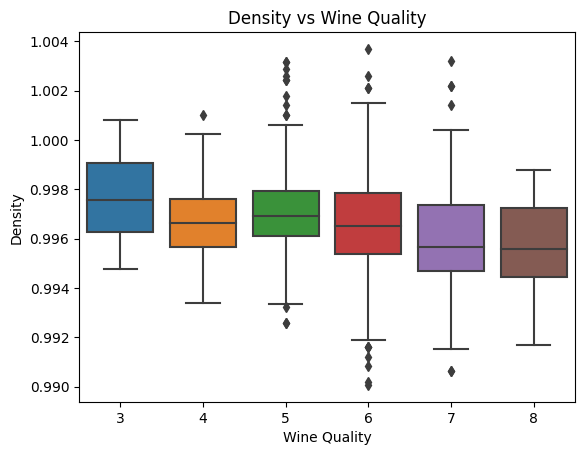

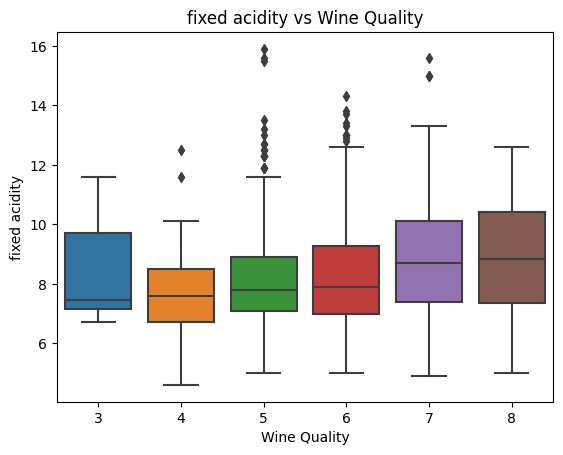

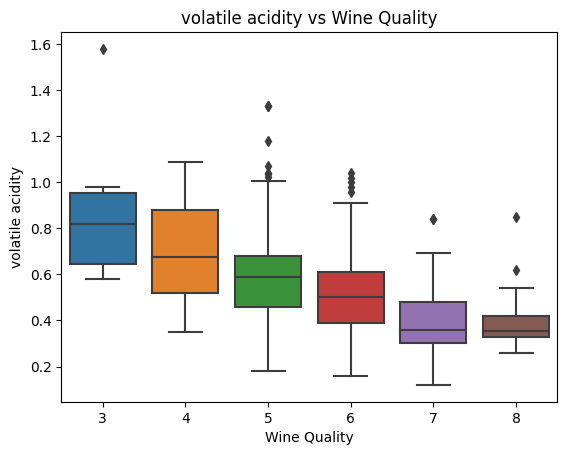

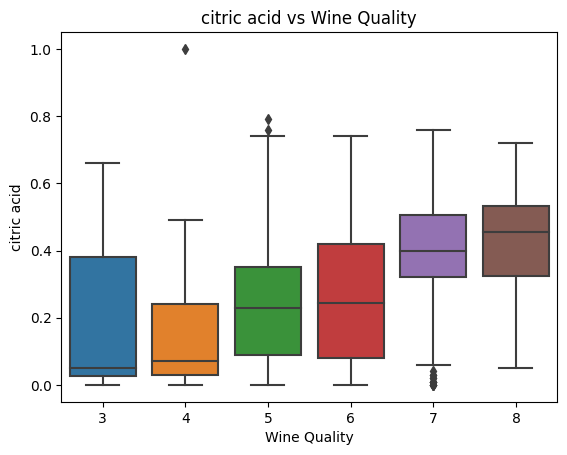

In [10]:
sns.boxplot(x='quality', y='density',data=data)
plt.title('Density vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()

sns.boxplot(x='quality', y='fixed acidity',data=data)
plt.title('fixed acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('fixed acidity')
plt.show()

sns.boxplot(x='quality', y='volatile acidity',data=data)
plt.title('volatile acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('volatile acidity')
plt.show()

sns.boxplot(x='quality', y='citric acid',data=data)
plt.title('citric acid vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('citric acid')
plt.show()

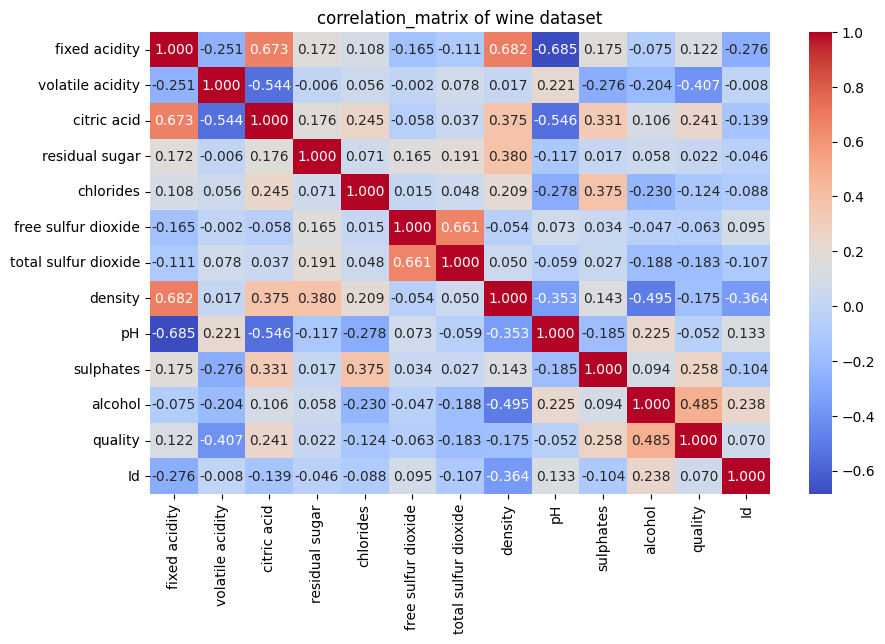

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

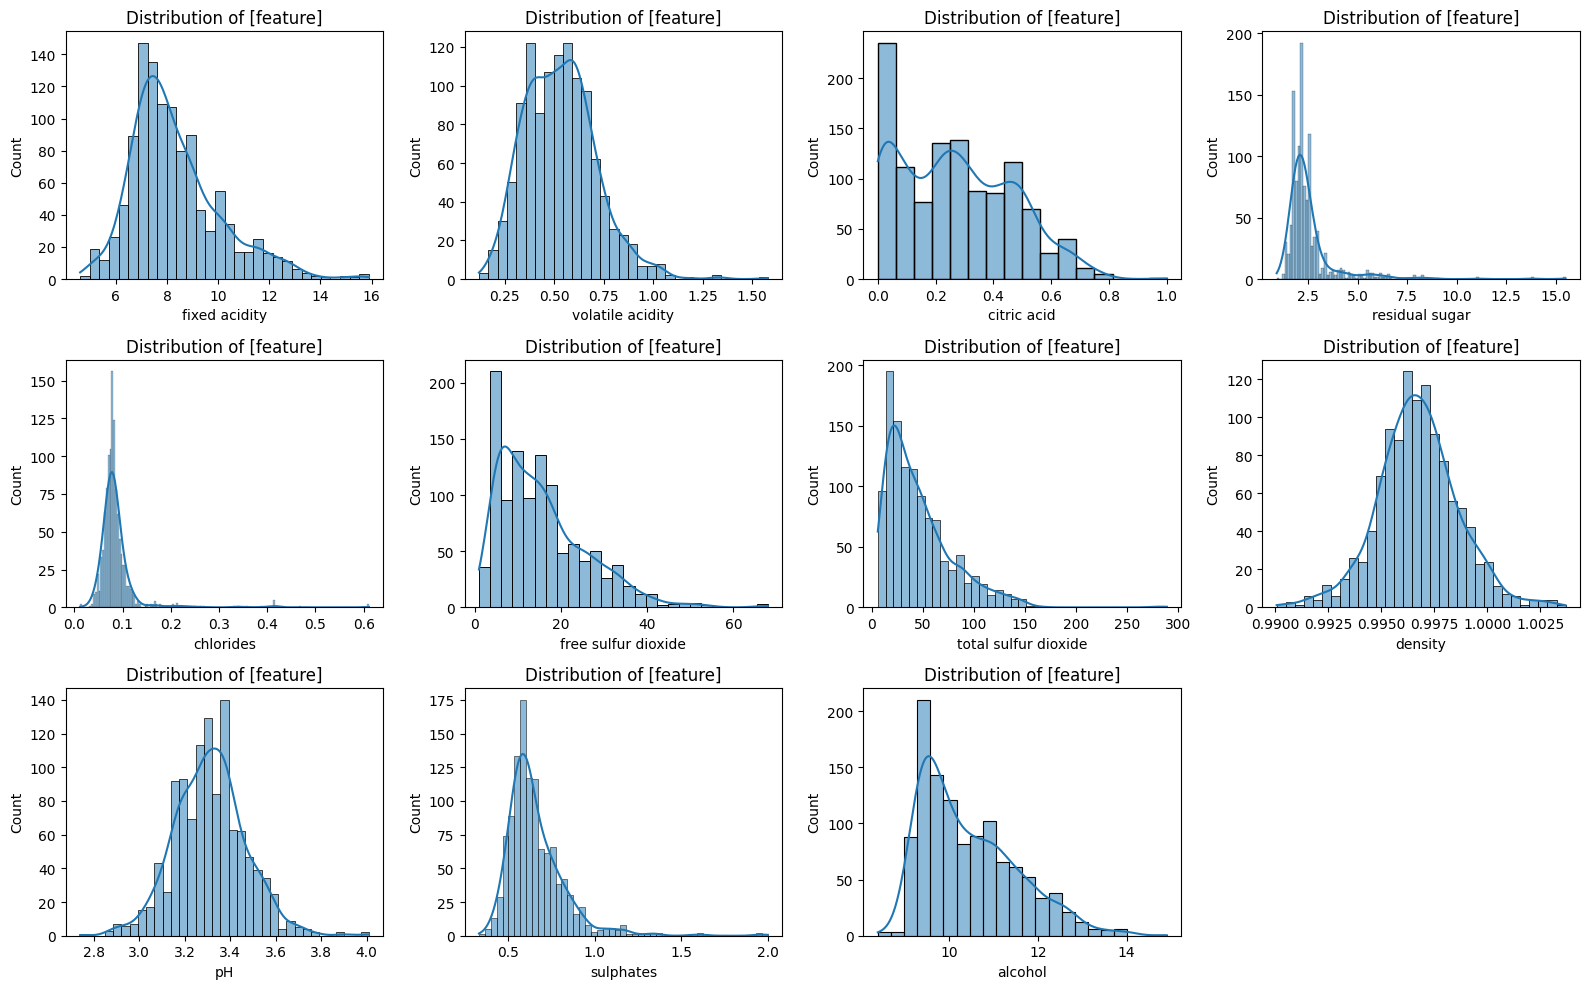

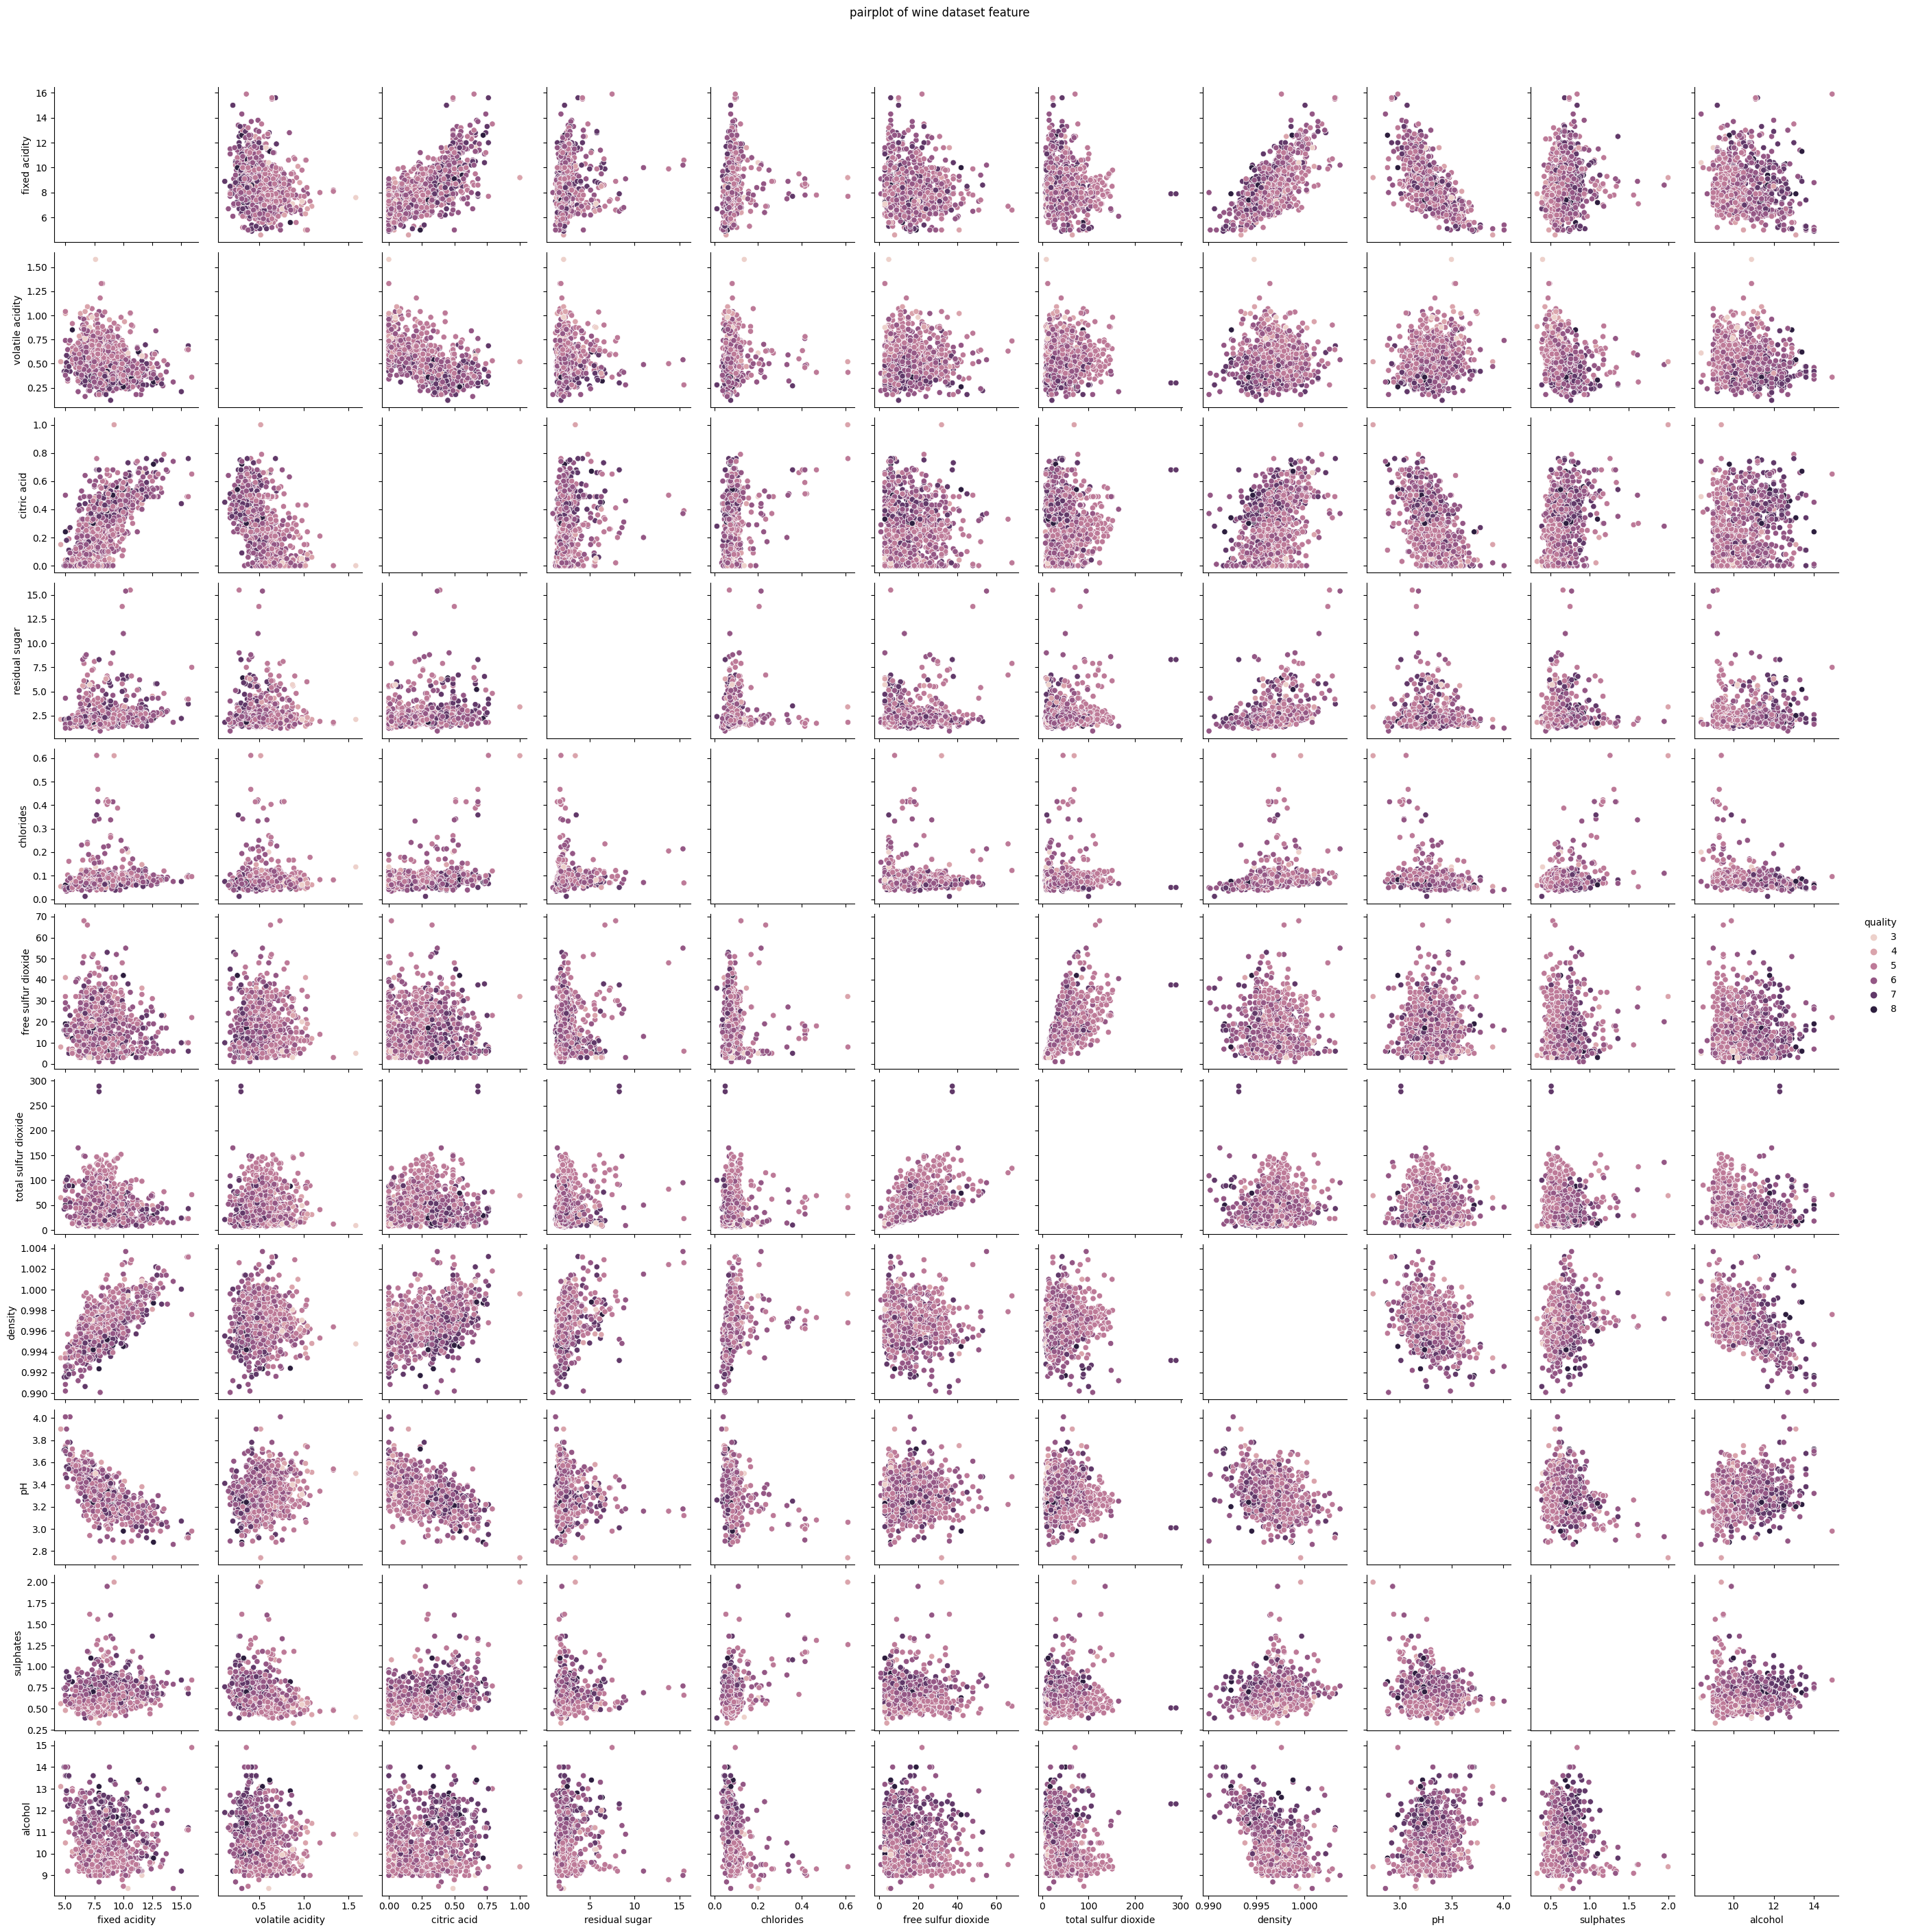

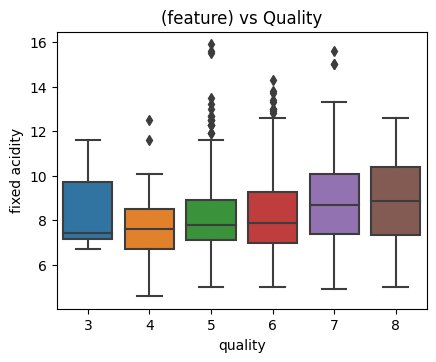

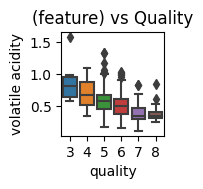

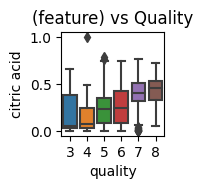

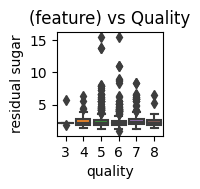

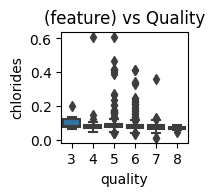

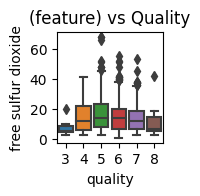

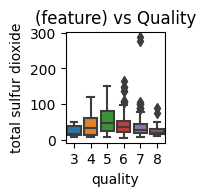

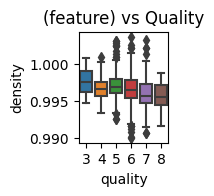

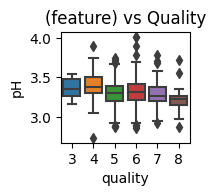

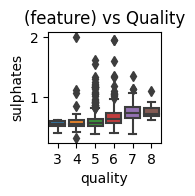

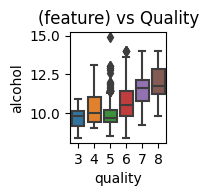

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('correlation_matrix of wine dataset')
plt.show()

features = data.columns[:-2]
plt.figure(figsize=(16,10))
for i,feature in enumerate(features,1):
    plt.subplot(3,4,i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of [feature]')
plt.tight_layout()
plt.show()

sns.pairplot(data, vars=features, hue='quality', diag_kind='Kde')
plt.suptitle('pairplot of wine dataset feature',y=1.03)
plt.show()

plt.figure(figsize=(16,10))
for i, feature in enumerate(features,1):
    plt.subplot(3,4,i)
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'(feature) vs Quality')
    plt.tight_layout()
    plt.show()
    
    